Author: Bradley Scott
Date: 10/24/2023
Note: Chat GPT was used for some parts of the code below, particularly the plotting.

In [ ]:
# this cell is just auto formatting so I can be lazy and still have pretty code
#!pip install black[jupyter]

#from google.colab import drive
#drive.mount("/content/drive")

#!black /content/drive/MyDrive/'Colab Notebooks'/'DATA602_HW2.ipynb'

In [95]:
# install the necessary modules
#!pip install requests
#!pip install pandas
#!pip install numpy
#!pip install beautifulsoup4

# import the necessary modules
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# use requests to pull the data
url = (
    "https://web.archive.org/web/20201112015618/https://www.spaceweatherlive"
    ".com/en/solar-activity/top-50-solar-flares.html"
)

r = requests.get(url)

# use beautifulsoup to parse the data
soup = BeautifulSoup(r.content, "html")

In [96]:
# look for the table we need with prettify
# suppressing output since hidding it made it still display in the .ipynb file
# print(soup.prettify())

In [97]:
# grab the table data
tb = soup.find("table")

# read the spaceweather live table into a dataframe
spwl_df = pd.read_html(str(tb))[0]

# change the column names
spwl_df.columns = [
    "rank",
    "x_class",
    "date",
    "region",
    "start_time",
    "max_time",
    "end_time",
    "movie",
]

# look at the top 5 in the dataframe
print(spwl_df.head())

# this completes step 1 of the assignment

   rank x_class        date  region start_time max_time end_time  \
0     1    X28+  2003/11/04     486      19:29    19:53    20:06   
1     2    X20+  2001/04/02    9393      21:32    21:51    22:03   
2     3  X17.2+  2003/10/28     486      09:51    11:10    11:24   
3     4    X17+  2005/09/07     808      17:17    17:40    18:03   
4     5   X14.4  2001/04/15    9415      13:19    13:50    13:55   

               movie  
0  MovieView archive  
1  MovieView archive  
2  MovieView archive  
3  MovieView archive  
4  MovieView archive  


In [98]:
# step 2 of the assignment
# drop the movie column and confirm that it was dropped
del spwl_df["movie"]
# commented out since no longer needed
# print(spwl_df.head())

# import datetime
from datetime import datetime

# combine the 3 time variables with the date
# for each row in the dataset
for index, row in spwl_df.iterrows():
    # for each of the three time columns
    for time_col in ["start_time", "max_time", "end_time"]:
        # Combine date and time
        combined_datetime = f"{row['date']} {row[time_col]}"
        # Convert to datetime format
        datetime_obj = datetime.strptime(combined_datetime, "%Y/%m/%d %H:%M")
        # Update the DataFrame
        spwl_df.at[index, time_col] = datetime_obj

# convert the time time columns to datetime format
spwl_df["start_time"] = pd.to_datetime(spwl_df["start_time"])
spwl_df["max_time"] = pd.to_datetime(spwl_df["max_time"])
spwl_df["end_time"] = pd.to_datetime(spwl_df["end_time"])

# Rename the time columns to end with _datetime
spwl_df = spwl_df.rename(
    columns={
        "start_time": "start_datetime",
        "max_time": "max_datetime",
        "end_time": "end_datetime",
    }
)

# replace - in the region column with Nan
# commented out since no longer needed
# print(spwl_df[spwl_df["region"] == "-"])  # there wasn't any that existed in the data
spwl_df["region"] = spwl_df["region"].replace("-", np.nan)

print(spwl_df.head())

# this completes step 2 of the assignment

   rank x_class        date  region      start_datetime        max_datetime  \
0     1    X28+  2003/11/04     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1     2    X20+  2001/04/02    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2     3  X17.2+  2003/10/28     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
3     4    X17+  2005/09/07     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
4     5   X14.4  2001/04/15    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   

         end_datetime  
0 2003-11-04 20:06:00  
1 2001-04-02 22:03:00  
2 2003-10-28 11:24:00  
3 2005-09-07 18:03:00  
4 2001-04-15 13:55:00  


In [99]:
# start step 3
# use requests to pull the data
# http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html is missing data
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
r = requests.get(url)

# use beautifulsoup to parse the data
soup = BeautifulSoup(r.content, "html")

# look for the table we need with prettify
# print(soup.prettify())

In [100]:
# grab the table data
tb = soup.find("pre")

# read the table into a dataframe
data_text = soup.find("pre").text.split("\n")[12:-2]

# for testing only - verifying that it pulled only the text we want
# print(data_text)

# Split each line of text into a list of values
data_rows = [line.split() for line in data_text if line]

# Extracting the required columns
data_processed = []
for row in data_rows:
    start_date = row[0]
    start_time = row[1]
    end_date = row[2]
    end_time = row[3]
    start_frequency = row[4]
    end_frequency = row[5]
    flare_location = row[6]
    flare_region = row[7]
    flare_classification = row[8]
    cme_date = row[9]
    cme_time = row[10]
    cme_angle = row[11]
    cme_width = row[12]
    cme_speed = row[13]
    plot = row[14]
    data_processed.append(
        [
            start_date,
            start_time,
            end_date,
            end_time,
            start_frequency,
            end_frequency,
            flare_location,
            flare_region,
            flare_classification,
            cme_date,
            cme_time,
            cme_angle,
            cme_width,
            cme_speed,
            plot,
        ]
    )

# Convert the processed data into a DataFrame
nasa_df = pd.DataFrame(
    data_processed,
    columns=[
        "start_date",
        "start_time",
        "end_date",
        "end_time",
        "start_frequency",
        "end_frequency",
        "flare_location",
        "flare_region",
        "flare_classification",
        "cme_date",
        "cme_time",
        "cme_angle",
        "cme_width",
        "cme_speed",
        "plot",
    ],
)

# Display the first few rows of the DataFrame
print(nasa_df.head(10))

# Display the number of rows and columns to verify all data is there
print(nasa_df.shape)


# this ends step 3 of the project

   start_date start_time end_date end_time start_frequency end_frequency  \
0  1997/04/01      14:00    04/01    14:15            8000          4000   
1  1997/04/07      14:30    04/07    17:30           11000          1000   
2  1997/05/12      05:15    05/14    16:00           12000            80   
3  1997/05/21      20:20    05/21    22:00            5000           500   
4  1997/09/23      21:53    09/23    22:16            6000          2000   
5  1997/11/03      05:15    11/03    12:00           14000           250   
6  1997/11/03      10:30    11/03    11:30           14000          5000   
7  1997/11/04      06:00    11/05    04:30           14000           100   
8  1997/11/06      12:20    11/07    08:30           14000           100   
9  1997/11/27      13:30    11/27    14:00           14000          7000   

  flare_location flare_region flare_classification cme_date cme_time  \
0         S25E16         8026                 M1.3    04/01    15:18   
1         S28E19   

In [101]:
# this starts step 4 of the project

# for testing/research purposes
# what are all the column datatypes - objects
# print(nasa_df.dtypes)


# START_DATE
# lets convert start_date to a date
nasa_df["start_date"] = pd.to_datetime(nasa_df["start_date"], errors="coerce")

# for testing/research purposes
# are all start dates good to go? Returns true so it is
# print(nasa_df['start_date'].notna().all())


# START_TIME
# going to use regex to check that all times are displayed correct
st_time_pat = r"^([01]?[0-9]|2[0-3]):[0-5][0-9]$"

# for testing/research purposes
# returns True so all start_time values are good to go
# print(nasa_df['start_time'].str.match(st_time_pat).all())


# END_DATE
# using regex to check that all the dates are displayed correctly
end_dt_pat = r"^(0[1-9]|1[0-2])/(0[1-9]|[12][0-9]|3[01])$"

# for testing/research purposes
# returns True so all end dates are valid
# print(nasa_df['end_date'].str.match(end_dt_pat).all())


# END_TIME
# we can use the same regex pattern from start time to check end_time

# for testing/research purposes
# this came up false so lets try to find the row/rows that are causing the issue
# print(nasa_df['end_time'].str.match(st_time_pat).all())

is_valid = nasa_df["end_time"].str.match(st_time_pat)

invalid_rows = nasa_df[~is_valid]
# for testing/research purposes
# print(invalid_rows)
# the invalid end_times are 24:00. I can convert these to 23:59 with minimal
# change in the data
nasa_df["end_time"] = nasa_df["end_time"].replace("24:00", "23:59")


# START_FREQUENCY
# are there any non numerical start_frequency?
non_numerical_rows = nasa_df[
    nasa_df["start_frequency"].apply(lambda x: pd.to_numeric(x, errors="coerce")).isna()
]
# for testing purposes only - seeing what the rows look like
# print(non_numerical_rows)

# so the only non numerical rows for start_frequency
# is when start_frequency = '????'
nasa_df["start_frequency"] = nasa_df["start_frequency"].replace("????", np.nan)

# for testing purposes only -  to confirm the change
# print(nasa_df[nasa_df['start_frequency'].isna()])


# END_FREQUENCY

# are there any non numerical end_frequency?
non_numerical_rows = nasa_df[
    nasa_df["end_frequency"].apply(lambda x: pd.to_numeric(x, errors="coerce")).isna()
]
# for testing purposes only - seeing what the rows look like
# print(non_numerical_rows)

# so the only non numerical rows for
# end_frequency is when end_frequency = '????'
nasa_df["end_frequency"] = nasa_df["end_frequency"].replace("????", np.nan)

# for testing purposes only -  to confirm the change
# print(nasa_df[nasa_df['end_frequency'].isna()])


# FLARE_LOCATION

# flare location Back? is NaN but lets check for anything not in a format of
# (1 letter from N,E,S,W) + (0 or more numbers) +
# (0 or more letters from N,E,S,W) + (0 or more numbers) + (0 or 1 'b')

# first we need to strip flare_location of any trailing or leading zeros
nasa_df["flare_location"] = nasa_df["flare_location"].str.strip()

# Regex pattern
pattern = r"^[NESW]\d*[NESW]*\d*b?$"

# Find rows where 'flare_location' does not match the regex pattern
non_matching_rows = nasa_df[~nasa_df["flare_location"].str.match(pattern)]
# for testing purposes only - see what the non matching rows look like
# print(non_matching_rows)
# for testing purposes only - get the count of non matching rows (32)
# non_matching_count = (~nasa_df['flare_location'].str.match(pattern)).sum()
# print(non_matching_count)

# convert the rows to NaN
nasa_df["flare_location"] = np.where(
    nasa_df["flare_location"].str.match(pattern), nasa_df["flare_location"], np.nan
)

# for testing purposes only -
#          confirm the same number of rows were converted (32)
# print(nasa_df[nasa_df['flare_location'].isna()])
# nan_count = nasa_df['flare_location'].isna().sum()
# print(nan_count)


# FLARE_REGION

# NOAA active region numbers should just be 4 to 5 numbers
# They also have things like
#          FILA (filament) and DSF(disappearing solar filament)
# but unless we need it later, we're going to mark them as NaN
# a filament is a loop burst thing that occurs on the sun
# looking at the data there is also
#          'EP', 'EP?', 'altr', and various lengths of '-----'
# pd.set_option("display.max_rows", None)
pattern = r"^\d+$"
non_matching_rows = nasa_df[~nasa_df["flare_region"].str.match(pattern)]
# for testing purposes -
#    looking at what all is in the column that doesn't fit the pattern
# print(non_matching_rows['flare_region'])
# pd.reset_option("display.max_rows")
# for testing purposes only - get the count of non matching rows (100)
# non_matching_count = (~nasa_df['flare_region'].str.match(pattern)).sum()
# print(non_matching_count)

# convert the rows to NaN
nasa_df["flare_region"] = np.where(
    nasa_df["flare_region"].str.match(pattern), nasa_df["flare_region"], np.nan
)

# for testing purposes only -
#      confirm the same number of rows were converted (100)
# nan_count = nasa_df['flare_region'].isna().sum()
# print(nan_count)


# FLARE_CLASSIFICATION
# for testing purposes only - reviewing what all flare_classification can be
# looks like it is always (letter)+(number)+(.)+(number OR blank)
# for empty ones it is always (----)
# pd.set_option("display.max_rows", None)
# print(nasa_df.groupby('flare_classification').size())
# pd.reset_option("display.max_rows")

# replace the flare_classifications when they are ----
nasa_df["flare_classification"] = nasa_df["flare_classification"].replace(
    "----", np.nan
)

# checking the numbers line up. 104 are now NaN
# nan_count = nasa_df['flare_classification'].isna().sum()
# print(nan_count)


# CME_DATE
cme_pat = r"^\d{2}/\d{2}$"

# returns False so there are some records that are not in the right format for cme_date
# print(nasa_df["cme_date"].str.match(cme_pat).all())
non_matching_rows = nasa_df[~nasa_df["cme_date"].str.match(cme_pat)]
# looks like cme_date is --/-- when it is empty and there is 20 of them
# print(non_matching_rows.groupby("cme_date").size())

# replace the cme_dates when they are --/--
nasa_df["cme_date"] = nasa_df["cme_date"].replace("--/--", np.nan)
# checking the numbers line up. 20 are now NaN
nan_count = nasa_df["cme_date"].isna().sum()
# print(nan_count)


# CME_TIME
cme_t_pat = r"^(?:[01]?[0-9]|2[0-3]):[0-5][0-9]|24:00$"

# returns False so there are some records that are not in the right format for cme_time
# print(nasa_df["cme_time"].str.match(cme_t_pat).all())
non_matching_rows = nasa_df[~nasa_df["cme_time"].str.match(cme_t_pat)]
# looks like cme_time is --:-- when it is empty and there is 20 of them
# print(non_matching_rows.groupby("cme_time").size())

# replace the cme_times when they are --:--
nasa_df["cme_time"] = nasa_df["cme_time"].replace("--:--", np.nan)
# checking the numbers line up. 20 are now NaN so it's good to go
nan_count = nasa_df["cme_time"].isna().sum()
# print(nan_count)

# CME_ANGLE
# The CPA column (cme_angle) contains angles in degrees for most rows, except for halo
# flares, which are coded as Halo. Create a new column that indicates if a row
# corresponds to a halo flare or not, and then replace Halo entries in the
# cme_angle column as NA.
cme_ang_pat = r"^(?:[0-9]{1,2}|[12][0-9]{2}|3[0-5][0-9]|360|Halo)$"

# returns False so there are records that don't meet our format
# print(nasa_df["cme_angle"].str.match(cme_ang_pat).all())
non_matching_rows = nasa_df[~nasa_df["cme_angle"].str.match(cme_ang_pat)]
# looks like cme_angle is ---- when it is empty and there is 21 of them
# print(non_matching_rows.groupby("cme_angle").size())
non_matching_rows

# replace the cme_angle when it is ----
nasa_df["cme_angle"] = nasa_df["cme_angle"].replace("----", np.nan)
# checking the numbers line up. 21 are now NaN so it's good to go
nan_count = nasa_df["cme_angle"].isna().sum()
# print(nan_count)


# create the new column as a True/False value for when the angle is 'Halo'
nasa_df["is_halo"] = nasa_df["cme_angle"] == "Halo"

# replace 'Halo' as NaN in cme_angle. Should be 264 of them for 285 NaN total now
nasa_df["cme_angle"] = nasa_df["cme_angle"].replace("Halo", np.nan)

# CME_WIDTH
# The width column indicates if the given value is a lower bound. Create a new column
# that indicates if width is given as a lower bound, and remove any non-numeric
# part of the width column.
cme_wid_pat = r"^(?:[0-9]{1,2}|[12][0-9]{2}|3[0-5][0-9]|360)$"

# returns False so there are records that don't meet our format
# print(nasa_df["cme_width"].str.match(cme_wid_pat).all())
non_matching_rows = nasa_df[~nasa_df["cme_width"].str.match(cme_wid_pat)]
# looks like cme_angle is ---- when it is empty and there is 21 of them
# print(non_matching_rows.groupby("cme_width").size())
# there is 4 rows that are --- , 16 rows that are ----, and one row that is 360h
# we also have 31 rows that indicate they are a lower bound since they start with >

# lets start by converting the --- rows
nasa_df["cme_width"] = nasa_df["cme_width"].replace("---", np.nan)
# converting the ---- rows
nasa_df["cme_width"] = nasa_df["cme_width"].replace("----", np.nan)
# converting the 360h row
nasa_df["cme_width"] = nasa_df["cme_width"].replace("360h", "360")

# make a flag indicating if cme_width is a lower bound or not
nasa_df["width_lower_bound"] = nasa_df["cme_width"].str.startswith(">")

# replace the > in cme_width
nasa_df["cme_width"] = nasa_df["cme_width"].str.replace(">", "", regex=False)

# CME_SPEED
cme_speed_pat = r"^\d+$"

# returns False so there are records that don't meet our format
# print(nasa_df["cme_speed"].str.match(cme_speed_pat).all())
non_matching_rows = nasa_df[~nasa_df["cme_speed"].str.match(cme_speed_pat)]
# looks like cme_speed is ---- when it is empty and there is 20 of them
# print(non_matching_rows.groupby("cme_speed").size())

# converting the ---- rows
nasa_df["cme_speed"] = nasa_df["cme_speed"].replace("----", np.nan)
# checking the numbers line up. 20 are now NaN so it's good to go
nan_count = nasa_df["cme_speed"].isna().sum()
# print(nan_count)


# PLOT
# all of the PLOT column is PHTX so there isn't any data needing cleaning
# print(nasa_df.groupby("plot").size())


# make the start_datetime flag by combining start_date and start_time
nasa_df["start_datetime"] = pd.to_datetime(
    nasa_df["start_date"].astype(str) + " " + nasa_df["start_time"]
)

# make the end_datetime flag by combining the year from start_date, end_date
# and the end_time flags
# Extract the year from 'start_date'
nasa_df["year"] = pd.to_datetime(nasa_df["start_date"]).dt.year.astype(str)

# Combine year with 'end_date', then combine with 'end_time'
# and convert to datetime format
nasa_df["end_datetime"] = pd.to_datetime(
    nasa_df["year"] + "-" + nasa_df["end_date"] + " " + nasa_df["end_time"]
)


# Combine year with 'cme_date', then combine with 'cme_time' and
# convert to datetime format
nasa_df["cme_datetime"] = pd.to_datetime(
    nasa_df["year"] + "-" + nasa_df["cme_date"] + " " + nasa_df["cme_time"]
)

# Drop the intermediate 'year' column
nasa_df.drop(columns="year", inplace=True)


# in order to make my dataset look exactly like the example in step 4
# convert flare_classification name to importance
nasa_df.rename(columns={"flare_classification": "importance"}, inplace=True)
# convert cme_angle name to cpa
nasa_df.rename(columns={"cme_angle": "cpa"}, inplace=True)
# convert cme_width name to width
nasa_df.rename(columns={"cme_width": "width"}, inplace=True)
# convert cme_speed name to speed
nasa_df.rename(columns={"cme_speed": "speed"}, inplace=True)
# drop start_date, start_time, end_date, end_time, cme_date, cme_time
nasa_df.drop(
    columns=[
        "start_date",
        "start_time",
        "end_date",
        "end_time",
        "cme_date",
        "cme_time",
    ],
    inplace=True,
)


# reorder the column so it displays the same
cols = (
    ["start_datetime"]
    + ["end_datetime"]
    + ["start_frequency"]
    + ["end_frequency"]
    + ["flare_location"]
    + ["flare_region"]
    + ["importance"]
    + ["cme_datetime"]
    + ["cpa"]
    + ["width"]
    + ["speed"]
    + ["plot"]
    + ["is_halo"]
    + ["width_lower_bound"]
)
nasa_df = nasa_df[cols]

In [102]:
# show the tidied table
nasa_df
# this concludes step 4

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360,1385,PHTX,True,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,2017-10-18 08:00:00,85,146,1001,PHTX,False,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX,False,False
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360,2077,----,True,False


In [103]:
# part 2: analysis
# question 1: can I replicate the top 50 solar flare table from
# spaceweatherlive.com using the nasa data(nasa_df)

# first we need to understand the importance flag
# we're given that X28 is the highest
# for all classese besides X (so the A,B,C,and M classes ) the number after the
# letter only goes up to 9
# for the X class though, it goes up to 28 at which point the sensors cut out.
# reference: https://science.nasa.gov/science-research/heliophysics/space-weather/
#                       solar-flares/what-is-a-solar-flare/

# so to get the top 50 flares we can get the importance colums starting with X
# and the top numbers after that

# get just the flares that are X class
# had to fill the NaN records so I wouldn't get an error for trying
# to use the string function
x_flares = nasa_df[nasa_df["importance"].fillna("").str.startswith("X")]


# Sort the flares based on the number after 'X'
sorted_x_flares = x_flares.sort_values(
    by="importance", key=lambda x: x.str[1:].astype(float), ascending=False
)

# Extract the top 50
top_50_flares = sorted_x_flares[:50]

print(top_50_flares[["importance", "start_datetime", "flare_region"]])

# we're missing spaceweatherlives number 4 that occured on 2005/09/07
# lets look at that start_datetime_specifically
filtered_rows = nasa_df[
    nasa_df["start_datetime"].dt.date == pd.to_datetime("2005/09/07").date()
]
print(filtered_rows)

# INTERESTING! Looks like spaceweatherlive is incorrect on their 4th category.
# It is not X17.7 but X1.7. They also keep cutting the region data down to 4 numbers
# when there is 5 number regions.
# Overall, I'd trust the NASA data over what spaceweatherlive.com has
# which means I trust our list more than theirs.

    importance      start_datetime flare_region
240       X28. 2003-11-04 20:00:00        10486
117       X20. 2001-04-02 22:05:00         9393
233       X17. 2003-10-28 11:10:00        10486
126       X14. 2001-04-15 14:05:00         9415
234       X10. 2003-10-29 20:55:00        10486
8         X9.4 1997-11-06 12:20:00         8100
514       X9.3 2017-09-06 12:05:00        12673
328       X9.0 2006-12-05 10:50:00        10930
237       X8.3 2003-11-02 17:30:00        10486
515       X8.3 2017-09-10 16:02:00          NaN
288       X7.1 2005-01-20 07:15:00        10720
359       X6.9 2011-08-09 08:20:00        11263
331       X6.5 2006-12-06 19:00:00        10930
317       X6.2 2005-09-09 19:45:00        10808
82        X5.7 2000-07-14 10:30:00         9077
121       X5.6 2001-04-06 19:35:00         9415
375       X5.4 2012-03-07 01:00:00        11429
135       X5.3 2001-08-25 16:50:00         9591
443       X4.9 2014-02-25 00:56:00        11990
193       X4.8 2002-07-23 00:50:00      

In [104]:
# part 2 question 2: write a function that finds the best matching row
# in the NASA data for each of the top 50 solar flares in SpaceWeatherLive data

# we will use xclass to match
# we can also match by date but from reviewing the time data in both datasets, there
# is mismatches in time even when it's the same observation
# we can use the region and if the nasa datas region is 5 in length then we'll use the
# last 4 to compare.
# Using these steps, we should be able to find all the errors in spaceweatherlives data


# is there any regions that are less than 1000 in the nasa data? if not we can safely
# add a 1 in front of all of the regions in temp_sp_df that start with 0
# I probably should also be converting region since its a number in the spaceweatherlive
# data and I want to compare the two
nasa_df["flare_region"] = pd.to_numeric(nasa_df["flare_region"], errors="coerce")
# nasa_df[nasa_df["flare_region"] < 1000]
# there's no regions under 1000 in the nasa data so if the spaceweather live data says
# 999 or under, it really should be 10999 since spaceweatherlive cut off the leading 1
# the next question in this is are there regions above 11000
# nasa_df[nasa_df["flare_region"] > 11000]
# there is
# so this means we can not just add a 1 in front of every region in the spaceweather
# data that is under 1000 and think we have fixed all of their messed up data
# However, adding a 1 in front of every region under 1000 will fix it quite a bit
# it just wont fix thingsl ike region 11263 in the nasa data being 1263 in the
# space weather data
# convert region to being numerical and fix the records under 1000
spwl_df["region"] = pd.to_numeric(spwl_df["region"], errors="coerce")
spwl_df.loc[spwl_df["region"] < 1000, "region"] += 10000


# getting the two tables into a format where it's easy to make comparisons
# take just the columns we will use for comparison from the spaceweatherlive data
temp_sp_df = spwl_df[["rank", "x_class", "date", "region"]]
# get rid of the + in the x_class column since the nasa data doesn't do that
# I had to make a copy and set it equal to avoid a warning message
# normally, I wouldn't concern myself with a warning message but I'm erring on the
# side of caution since this is HW
temp_sp_df = temp_sp_df.copy()
temp_sp_df.loc[:, "x_class"] = temp_sp_df["x_class"].str.rstrip("+")


# take just the columns we will use for comparison from the nasa data
# rename the columns so they line up with the spaceweatherlive data
temp_nasa_df = nasa_df[["importance", "start_datetime", "flare_region"]].rename(
    columns={
        "importance": "x_class",
        "flare_region": "region",
        "start_datetime": "date",
    }
)

# need to change start_datetime in the temp_nasa_df to just have the date and no time
temp_nasa_df["date"] = temp_nasa_df["date"].dt.strftime("%Y/%m/%d")

# convert the nasa datasets region flag to numeric and get rid of the decimal point
temp_nasa_df["region"] = pd.to_numeric(temp_nasa_df["region"], errors="coerce")
# Convert to integer to remove decimal points
temp_nasa_df["region"].fillna(-1, inplace=True)
temp_nasa_df["region"] = temp_nasa_df["region"].astype(int)
temp_nasa_df["region"] = temp_nasa_df["region"].replace(-1, np.nan)


# make the x_class in each table end with a decimal and a 0 so that they match
# better
# Define a function to add a decimal point and a 0 if not present
def add_decimal_and_zero(x):
    # Convert x to string if it's not already a string
    x = str(x)

    if "." not in x:
        return x + ".0"
    elif x.endswith("."):
        return x + "0"
    return x


# Apply the function to the x_class column
temp_sp_df["x_class"] = temp_sp_df["x_class"].apply(add_decimal_and_zero)
temp_nasa_df["x_class"] = temp_nasa_df["x_class"].apply(add_decimal_and_zero)


# make a new column on the nasa data that will hold the space weather rank if it
# exists in the space weather data
# initially set them all to null
nasa_df["sp_weather_rank"] = np.nan


def find_closest_match(row, df):
    # Check for exact matches in x_class
    x_class_match = df["x_class"] == row["x_class"]

    # Compute the absolute difference in days for the date column
    date_diff = (pd.to_datetime(df["date"]) - pd.to_datetime(row["date"])).abs().dt.days

    # Compare region values
    if len(str(row["region"])) == 4:
        region_diff = df["region"].astype(str).str[-4:] != str(row["region"])
    else:
        region_diff = df["region"] != row["region"]

    # Combine the differences to get a total "distance"
    # We give a high penalty (e.g., 1000 days) for non-matching x_class and region
    total_distance = (
        (~x_class_match * 100) + (region_diff * 100) + (date_diff != 0) * 1000
    )

    # Find the index of the row with the smallest distance
    closest_idx = total_distance.idxmin()

    # Return the closest row
    return df.loc[closest_idx]


# Finally, use your function to add a new column to the NASA dataset indicating its
# rank according to SpaceWeatherLive, if it appears in that dataset.
# Loop over each row in temp_sp_df
for i in range(len(temp_sp_df)):
    row = temp_sp_df.iloc[i]  # Get the row at index i from temp_sp_df
    closest_match = find_closest_match(row, temp_nasa_df)

    # Check if sp_weather_rank is non-blank for the closest_match
    existing_rank = nasa_df.loc[closest_match.name, "sp_weather_rank"]
    new_rank = int(temp_sp_df.iloc[i]["rank"])

    # Since some records in the nasa data match to two records in the spaceweatherlive
    # data, update the rank if it exists instead of overwriting it
    if pd.notna(existing_rank):  # If non-blank
        nasa_df.loc[
            closest_match.name, "sp_weather_rank"
        ] = f"{existing_rank}/{new_rank}"
    else:
        nasa_df.loc[closest_match.name, "sp_weather_rank"] = new_rank


# pull just the nasa data that has a sp_weather_rank
filtered_nasa_df = nasa_df[nasa_df["sp_weather_rank"].notna()]
# print(filtered_nasa_df)

# Create a temporary column for sorting
# I had to make a copy and set it equal to avoid a warning message
# normally, I wouldn't concern myself with a warning message but I'm erring on the
# side of caution since this is HW
filtered_nasa_df = filtered_nasa_df.copy()
filtered_nasa_df["sp_weather_rank"] = filtered_nasa_df["sp_weather_rank"].astype(str)
filtered_nasa_df["temp_sort"] = (
    filtered_nasa_df["sp_weather_rank"].str.split("/").str[0].astype(float)
)

# Sort the DataFrame based on the temporary column
sorted_df = filtered_nasa_df.sort_values(by="temp_sort", ascending=True)

# Drop the temporary column if it's no longer needed
sorted_df.drop(columns=["temp_sort"], inplace=True)

# print out the results
print(sorted_df[["start_datetime", "flare_region", "importance", "sp_weather_rank"]])

# I think these results are pretty good. It's correctly pulling the mistake for rank 4
# I don't love that rank 15, 16 and 31 all match to the same nasa record but when I
# looked at the data, there really doesn't seem to be any better match
# From looking at the records that I know should match, and comparing their
# start, max and end times, I think we're more likely to introduce more false positives
# if we were to include those flags.

         start_datetime  flare_region importance sp_weather_rank
240 2003-11-04 20:00:00       10486.0       X28.             1.0
117 2001-04-02 22:05:00        9393.0       X20.             2.0
233 2003-10-28 11:10:00       10486.0       X17.             3.0
316 2005-09-07 18:05:00       10808.0       X1.7          4.0/20
126 2001-04-15 14:05:00        9415.0       X14.             5.0
234 2003-10-29 20:55:00       10486.0       X10.             6.0
8   1997-11-06 12:20:00        8100.0       X9.4             7.0
514 2017-09-06 12:05:00       12673.0       X9.3             8.0
328 2006-12-05 10:50:00       10930.0       X9.0             9.0
237 2003-11-02 17:30:00       10486.0       X8.3            10.0
515 2017-09-10 16:02:00           NaN       X8.3            11.0
288 2005-01-20 07:15:00       10720.0       X7.1            12.0
359 2011-08-09 08:20:00       11263.0       X6.9            13.0
331 2006-12-06 19:00:00       10930.0       X6.5            14.0
317 2005-09-09 19:45:00  

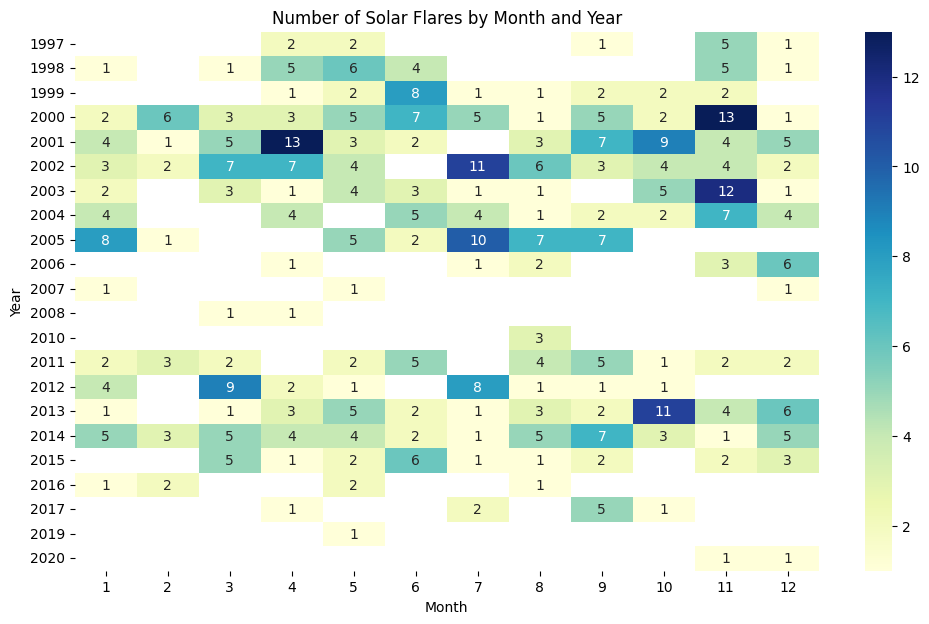

In [105]:
# part 2 question 3
# I'm curious to see if solar flares are more likely in certain months of the year
# so I'll make a plot where the x-axis is the months and the y-axis is the number of
# solar flares
# maybe I'll get fancy with it and I can make a z-axis that is the years so we can
# look at how differnet months look throughout the years
# Overall, it looks like we had more flares(or more data for them) before 2006
# Nothing is sticking out to say that a specific month has more flares than others
# 2001 may have had the most flares of any year

# import the necessary modules
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month and year from start_datetime
nasa_df["month"] = nasa_df["start_datetime"].dt.month
nasa_df["year"] = nasa_df["start_datetime"].dt.year

# Group by month and year and count the number of records
grouped = nasa_df.groupby(["year", "month"]).size().reset_index(name="count")

# Pivot the data
heatmap_data = grouped.pivot(index="year", columns="month", values="count")

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Number of Solar Flares by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [106]:
#!pip install plotly

# import the necessary module
import plotly.graph_objects as go

# get the data we need
nasa_df["month"] = nasa_df["start_datetime"].dt.month
nasa_df["year"] = nasa_df["start_datetime"].dt.year
grouped = nasa_df.groupby(["year", "month"]).size().reset_index(name="count")

# Map the count values to a colorscale
norm = plt.Normalize(grouped["count"].min(), grouped["count"].max())
colors = plt.cm.viridis(norm(grouped["count"]))

# Create lines to simulate bars with colors based on count and increased width
lines = []
for i, row in grouped.iterrows():
    color = f"rgb({int(colors[i][0]*255)}, {int(colors[i][1]*255)}, \
    {int(colors[i][2]*255)})"
    lines.append(
        go.Scatter3d(
            x=[row["month"], row["month"]],
            y=[row["year"], row["year"]],
            z=[0, row["count"]],
            mode="lines",
            line=dict(color=color, width=20),
        )
    )  # Increased width to 20

# Determine the range of years to display
min_year = min(grouped["year"].min(), 1997)
max_year = max(grouped["year"].max(), 2020)

# Create the 3D bar chart
fig = go.Figure(data=lines)

# Set labels, title, hide the legend, and specify tick values
fig.update_layout(
    scene=dict(
        xaxis_title="Month",
        yaxis_title="Year",
        zaxis_title="Number of Flares",
        xaxis=dict(
            tickvals=list(range(1, 13)), ticktext=[str(i) for i in range(1, 13)]
        ),  # Every month from 1 to 12
        yaxis=dict(
            tickvals=list(range(min_year, max_year + 1)),
            ticktext=[str(i) for i in range(min_year, max_year + 1)],
        ),  # Every year from min_year to max_year
    ),
    title="Number of Solar Flares by Month and Year",
    showlegend=False,  # Hide the legend
)

fig.show()

In [107]:
# extra credit - geomagnetic storms

# suppressing the output of this so I don't clutter up the pdf

# import the tab files to google collab from my local harddrive
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [108]:
# need to format the data using the information from the tab_fmt file

# Column  Format  Description
# ======  ======  ===========
# 1- 2     i2    yy, last two digits of year
# 3- 4     i2    mm, month (1-12)
# 5- 6     i2    dd, day of month (1-31)
# 8-19    4a3    3-hourly Kp indices, first 4 values
# 21-32    4a3    3-hourly Kp indices,  last 4 values
# 35-38     a4    Daily Kp sum (supplied only for tradition,
#                              use Ap scientific purposes!)
# 39-42     a4    Most disturbed and quiet days;
#                 Q: most quiet days (1-10, 10th quiet day is marked Q0)
#                 D: most disturbed days (1-5)
#                 A, K: not really quiet day
#                 *: not really disturbed day
# 43-45     i3    Ap index
# 46-50     f5.2  Cp geomagnetic index.

#parse out the data based on the lines from above
# I decided to pull the kp info out so it's easier to use later
def parse_line(line):
    data = {
        "yy": (line[0:2]),
        "mm": (line[2:4]),
        "dd": (line[4:6]),
        "kp1": line[7:10].strip(),
        "kp2": line[10:13].strip(),
        "kp3": line[13:16].strip(),
        "kp4": line[16:19].strip(),
        "kp5": line[20:23].strip(),
        "kp6": line[23:26].strip(),
        "kp7": line[26:29].strip(),
        "kp8": line[29:32].strip(),
        "daily_kp_sum": line[34:38].strip(),
        "disturbance": line[38:42].strip(),
        "Ap_index": int(line[42:45]),
        "Cp_index": float(line[45:50]),
    }
    return data


# Also note that the last 4 rows in each .tab file are summaries and we do not want to
# include them (we can put them in a separate dataframe if need be)
def read_tab_file(filename):
    data_list = []
    with open(filename, "r") as file:
        lines = file.readlines()
        for line in lines[:-4]:  # excludes the last 4 lines
            data_list.append(parse_line(line))
    return data_list


# the files are 9401 for january 1994
# and it goes from 9401 up to 1709
# so make a list of all the file names so I can loop through them all
# to make one giant df
years = [str(i).zfill(2) for i in list(range(94, 100)) + list(range(0, 18))]
file_names = [
    f"kp{year}{month}.tab"
    for year in years
    for month in [str(i).zfill(2) for i in range(1, 13)]
]
# it stops at 1709 so I need to delete 1710, 1711 and 1712
file_names.remove("kp1710.tab")
file_names.remove("kp1711.tab")
file_names.remove("kp1712.tab")

# list to hold individual DataFrames
dfs = []

# loop through each file name
for file_name in file_names:
    # read the file into a list of dictionaries
    data_list = read_tab_file(file_name)
    # convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_list)
    dfs.append(df)

# make one large df
final_df = pd.concat(dfs, ignore_index=True)

# need to extract just the integer part of each kp so I can make a Kp_max flag
def extract_integer(s):
    return int("".join(filter(str.isdigit, s)))

#make the Kp_max flag
final_df["Kp_max"] = final_df[
    ["kp1", "kp2", "kp3", "kp4", "kp5", "kp6", "kp7", "kp8"]
].apply(
    lambda row: max(
        extract_integer(row[col])
        for col in ["kp1", "kp2", "kp3", "kp4", "kp5", "kp6", "kp7", "kp8"]
    ),
    axis=1,
)

# have a glimpse of the data
print(final_df.head())

# check that all the years are in the data
distinct_yy = final_df["yy"].unique()
print(distinct_yy)

   yy  mm  dd kp1 kp2 kp3 kp4 kp5 kp6 kp7 kp8 daily_kp_sum disturbance  \
0  94  01  01  4o  4o  4+  4+  4o  4o  3+  3o          31o          D5   
1  94  01  02  3-  3+  4o  4-  4+  4-  3+  3o          28o               
2  94  01  03  3o  2o  3o  3+  3o  4-  4-  2-          23+               
3  94  01  04  2-  3+  2o  1o  1+  1o  1+  1-          12+         Q7K   
4  94  01  05  0+  1o  1-  1o  1o  1-  1o  2+           8o          Q4   

   Ap_index  Cp_index  Kp_max  
0        26       1.2       4  
1        21       1.1       4  
2        15       0.8       4  
3         6       0.3       3  
4         4       0.1       2  
['94' '95' '96' '97' '98' '99' '00' '01' '02' '03' '04' '05' '06' '07'
 '08' '09' '10' '11' '12' '13' '14' '15' '16' '17']


In [109]:
# question 1Replicate the Top 50 Webpage linked above using this data.
# the order of the data I want
desired_order = [
    "yy",
    "mm",
    "dd",
    "Ap_index",
    "kp1",
    "kp2",
    "kp3",
    "kp4",
    "kp5",
    "kp6",
    "kp7",
    "kp8",
    "Kp_max",
]

# reorder the columns in final_df and make a new df that will be the top50
top50_df = final_df[desired_order]

# take only the top 50 and sort them
top50_df = top50_df.sort_values(by="Ap_index", ascending=False).head(50)

#display the data
print(top50_df)

      yy  mm  dd  Ap_index kp1 kp2 kp3 kp4 kp5 kp6 kp7 kp8  Kp_max
3495  03  10  29       204  5-  4o  9o  8o  8-  8-  9-  9-       9
2553  01  03  31       192  7-  9-  9-  6+  7o  8o  8+  7+       9
3496  03  10  30       191  9-  7+  5+  5-  5o  7o  9o  9o       9
3767  04  07  27       186  8+  8-  7+  8o  9-  8+  6+  6o       9
2294  00  07  15       164  3o  4-  5-  4+  8o  9-  9o  9-       9
3873  04  11  10       161  8-  8+  9-  8+  7+  6+  5+  4+       9
3765  04  07  25       154  7o  7+  6+  8-  7+  8o  7+  7+       8
3517  03  11  20       150  1o  4-  6+  6+  8-  9-  9-  8o       9
1606  98  08  27       144  8o  8o  8-  7-  7-  7-  7o  6+       8
2773  01  11  06       142  9-  9-  7o  5o  5+  7-  6+  6+       9
3871  04  11  08       140  9-  9-  8+  7o  5o  3-  4+  5+       9
2322  00  08  12       123  5o  7+  8-  8-  7+  7+  6+  4-       8
3872  04  11  09       119  6-  6o  5o  6o  7o  7-  9-  7o       9
1635  98  09  25       117  8-  8o  8+  7o  6+  6-  3-  2+    

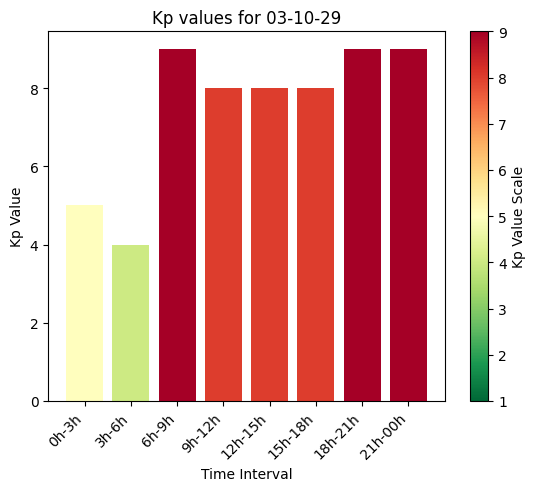

In [110]:
# Question 2
# Write a function that can create a plot similar to:
# https://www.spaceweatherlive.com/en/archive/2003/10/29/kp,
# given any specific date (not just the top-50 dates).
# If there is no data for a given date, the values should all be treated as
# zero (that's my interpretation --
# possibly there is another default that is more meaningful).

#import the entire matplotlib library
import matplotlib


# I'm assuming we just want the kp index breakdown by the 3 hour ranges
# because we don't also have the ap index in the second graph in our data
def plot_kp_values_for_date(yy, mm, dd):
    # find the row with the given date
    row = final_df[
        (final_df["yy"] == yy) & (final_df["mm"] == mm) & (final_df["dd"] == dd)
    ]

    #if the date doesn't exist, set all the values to 0 and still display the data
    if len(row) == 0:
        print("No data found for the given date! Treating all kp values as 0.")
        kp_values = [0 for _ in range(8)]
    else:
        # extract kp values and convert them to integers
        kp_values = [extract_integer(row[f"kp{i}"].values[0]) for i in range(1, 9)]

    # Generate colors based on kp values using the RdYlGn colormap in reverse
    colormap = matplotlib.colormaps["RdYlGn_r"]  # Access colormap by name

    # Normalize the values to fit within the color range
    norm = plt.Normalize(vmin=1, vmax=9)
    colors = [colormap(norm(val)) for val in kp_values]

    # X-axis labels
    labels = [
        "0h-3h",
        "3h-6h",
        "6h-9h",
        "9h-12h",
        "12h-15h",
        "15h-18h",
        "18h-21h",
        "21h-00h",
    ]

    # Plotting the bar chart
    fig, ax = plt.subplots()
    bars = ax.bar(labels, kp_values, color=colors)
    ax.set_xlabel("Time Interval")
    ax.set_ylabel("Kp Value")
    ax.set_title(f"Kp values for {yy}-{mm}-{dd}")

    # Setting x-axis tick locations and adjusting their labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
      # rotation is set to 45 degrees so they don't overlap

    # Add a colorbar to show the gradient scale
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, ticks=np.arange(1, 10))
    cbar.set_label("Kp Value Scale")

    plt.show()


plot_kp_values_for_date("03", "10", "29")

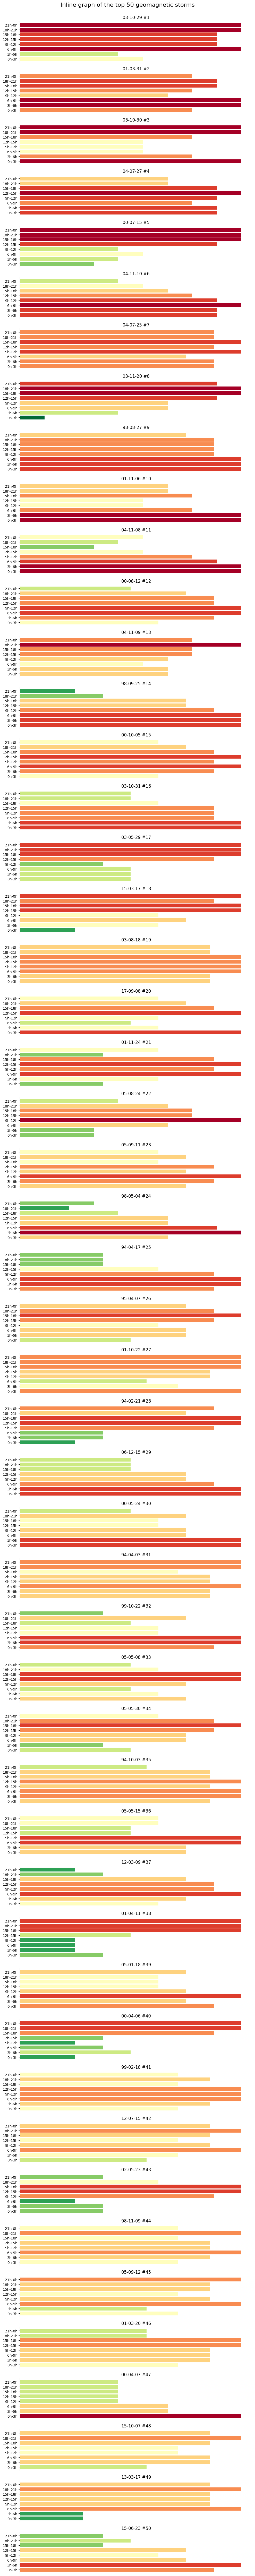

In [111]:
# question 3
# Let's go one step beyond what is shown here:
# https://www.spaceweatherlive.com/en/auroral-activity/top-50-geomagnetic-storms,
# and instead of showing the raw numbers for each date, write code to draw inline
# graphs instead. There are different ways to do this, and this might require using
# some more advanced plotting functionality.
# I haven't fully thought through how one might do it.

#make a function that'll plot the inline charts
def inline_bar_chart(values, ax, colors):
    """Draw an inline bar chart on the specified axis."""
    ax.barh(range(len(values)), values, color=colors)

    # Markings for the y-axis ticks
    labels = [
        "0h-3h",
        "3h-6h",
        "6h-9h",
        "9h-12h",
        "12h-15h",
        "15h-18h",
        "18h-21h",
        "21h-0h",
    ]
    ax.set_yticks(range(len(values)))
    ax.set_yticklabels(labels)

    # Removing the x-axis
    ax.xaxis.set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)


def plot_top_50_storms(top50_df):
    # Create a figure and axes to host the inline plots
    fig, axs = plt.subplots(
        len(top50_df), 1, figsize=(10, 2 * len(top50_df))
    )  # Adjusting the figure height

    # Generate colormap for colors
    colormap = plt.get_cmap("RdYlGn_r")

    for i, (idx, row) in enumerate(top50_df.iterrows()):
        kp_values = [extract_integer(row[f"kp{j}"]) for j in range(1, 9)]

        # Normalize values to get colors
        norm = plt.Normalize(vmin=1, vmax=9)
        colors = [colormap(norm(val)) for val in kp_values]

        # Plot the inline bar chart
        inline_bar_chart(kp_values, axs[i], colors)

        # Set title for each subplot with the date and its ranking
        axs[i].set_title(
            f"{row['yy']}-{row['mm']}-{row['dd']} #{i+1}"
        )  # Added ranking to the title

    fig.suptitle(
        "Inline graph of the top 50 geomagnetic storms", fontsize=16, y=1.00
    )
    plt.tight_layout()
    plt.show()


# Call the function
plot_top_50_storms(top50_df)

In [112]:
# Question 4
# Write the code to draw a single plot where each of the dates is shown with as a
# line rather than as a bar chart, with all 50 dates on the same plot.
# Explore ways to make this plot understandable.


#need the plotly graph objects
import plotly.graph_objects as go

# Melt the DataFrame for easy plotting
melted_df = top50_df.melt(
    id_vars=["yy", "mm", "dd", "Ap_index", "Kp_max"],
    value_vars=["kp1", "kp2", "kp3", "kp4", "kp5", "kp6", "kp7", "kp8"],
    var_name="kp_interval",
    value_name="kp_value",
)

# Convert the kp_value to just the integer part
melted_df["kp_value"] = melted_df["kp_value"].str.extract("(\d+)").astype(float)

# Map time intervals to numerical y-values
time_interval_mapping = {
    "kp1": 1.5,
    "kp2": 4.5,
    "kp3": 7.5,
    "kp4": 10.5,
    "kp5": 13.5,
    "kp6": 16.5,
    "kp7": 19.5,
    "kp8": 22.5,
}
melted_df["hour"] = melted_df["kp_interval"].map(time_interval_mapping)

# Create an empty figure
fig = go.Figure()

# Add a line for each date
for date, group in melted_df.groupby(["yy", "mm", "dd"]):
    fig.add_trace(
        go.Scatter3d(
            x=[f"{date[0]}-{date[1]}-{date[2]}"] * group.shape[0],
            y=group["hour"],
            z=group["kp_value"],
            mode="lines",
            line=dict(width=4),
            name=f"{date[0]}-{date[1]}-{date[2]}",
        )
    )

# Adjust layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title="Date",
        yaxis_title="Hour",
        zaxis_title="Kp Value",
        aspectratio=dict(x=2, y=1, z=0.7),
        yaxis=dict(
            tickvals=[1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5],
            ticktext=[
                "0h-3h",
                "3h-6h",
                "6h-9h",
                "9h-12h",
                "12h-15h",
                "15h-18h",
                "18h-21h",
                "21h-0h",
            ],
        ),
    ),
    showlegend=False,
)
fig.show()

# I don't love this graph but it does show us that the largest geomagnetic storms
# are clustered in the years from about 1999 to 2006